In [64]:
# importing libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn import random_projection
from sklearn.preprocessing import scale

# setting random seed
np.random.seed(42)

## Clustering 

In [ ]:
# load and scale data
digits = load_digits()
data   = scale(digits.data)

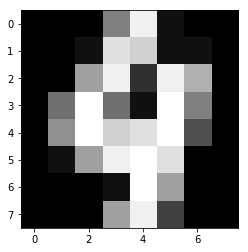

In [55]:
plt.imshow(digits.data[14].reshape((8,8)), cmap='gray')
plt.show()

In [33]:
# k means clustering
k_means = KMeans(init='k-means++', n_clusters=n_digits, n_init=10, random_state=2018)
k_means.fit(data)

# evaluation of the metric  
metrics.silhouette_score(data, k_means.labels_, metric='euclidean')

0.14581809033799656

In [43]:
# pca based clustering 
reduced_data = PCA(n_components=2).fit_transform(data)
k_means_pca = KMeans(init='k-means++', n_clusters=n_digits, n_init=10, random_state=2018)
k_means_pca.fit(reduced_data)
centroids = k_means_pca.cluster_centers_

# evaluation of the metric  
metrics.silhouette_score(data, k_means_pca.labels_, metric='euclidean')

0.05999883595938525

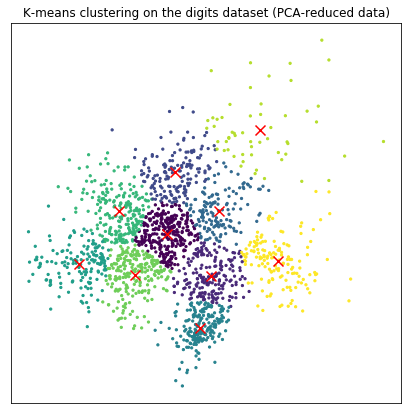

In [63]:
# ploting reduced data
plt.figure(figsize=(7,7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=k_means_pca.labels_, s=5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=2, color='red', zorder=10)
plt.xticks(())
plt.yticks(())
plt.title('K-means clustering on the digits dataset (PCA-reduced data)')
plt.show()

## Random projection 

In [72]:
from sklearn import random_projection
X = np.random.rand(100, 10000)
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape

(100, 3947)